In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD

# Loading Vocabullary

A function that reads vocabulary created by cleaning the datasets

In [2]:
def loadVocab(fileName):

# load file into list    
    with open(fileName) as f:
        content = f.readlines()
        content = [x.strip() for x in content] 
        return content

# Count Vector

This is a matrix that contains for each tweet the count of words in the vocabulary set that occured

In [7]:
def createCountVector(fileName1,fileName2):

    vocab_pos = loadVocab(fileName1)
    vocab_neg = loadVocab(fileName2)
    # find the combination of both vocabularies and remove common words
    combined_vocab = np.unique(vocab_pos + vocab_neg)
    # load the tweets 
    raw_text1 = pd.read_table('../data/train_pos.txt',header = None,names=['tweets'])
    raw_text2 = pd.read_table('../data/train_neg.txt',header = None,names=['tweets'])
    positiveTweets = raw_text1['tweets'].apply(str)
    negativeTweets = raw_text2['tweets'].apply(str)
    dataset = pd.concat([positiveTweets,negativeTweets])

    # labels/output map : positive-> 0 and negative -> 1
    labels = np.zeros((positiveTweets.shape[0] + negativeTweets.shape[0],),dtype=int)
    labels[negativeTweets.shape[0]:] = 1
    
    #occurence matrix representation
    cv = CountVectorizer(vocabulary=combined_vocab)
    occurence = cv.fit_transform(dataset)
    #frequency of word matrix representation
    tf_transformer = TfidfTransformer(use_idf=False).fit(occurence)
    frequency = tf_transformer.transform(occurence)
        
    return occurence,labels

# VISUALIZATION

Visualizing the data using PCA

In [8]:
def visualization(X,labels):

    pca = TruncatedSVD(n_components=2)
    projected = pca.fit_transform(X)
    plt.scatter(projected[:, 0], projected[:, 1],
            c=labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 2))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar()
    plt.show()

/home/omar/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


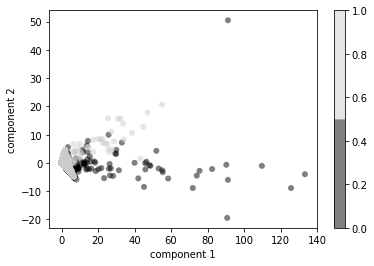

In [9]:
count,labels = createCountVector("../vocabulary/train_pos_vocab.txt","../vocabulary/train_neg_vocab.txt")
visualization(count,labels)